<a href="https://colab.research.google.com/github/akshuoo7/python/blob/master/FirstNNFinished.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(60000, 28, 28)
(10000, 28, 28)


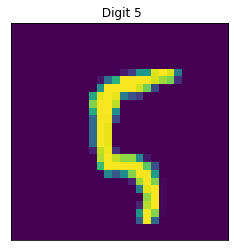

min and max value in image:  0 255


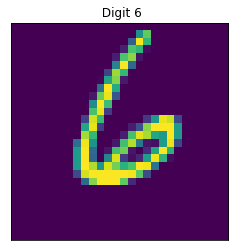

min and max value in image:  0.0 1.0
(28, 28, 1)


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# helper functions
def show_min_max(array, i):
  random_image = array[i]
  print("min and max value in image: ", random_image.min(), random_image.max())


def plot_image(array, i, labels):
  plt.imshow(np.squeeze(array[i]))
  plt.title(" Digit " + str(labels[i]))
  plt.xticks([])
  plt.yticks([])
  plt.show()


img_rows, img_cols = 28, 28  

num_classes = 10 

(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 
(train_images_backup, train_labels_backup), (test_images_backup, test_labels_backup) = mnist.load_data() 


print(train_images.shape) 
print(test_images.shape) 

train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

plot_image(train_images, 100, train_labels)
show_min_max(train_images, 100)

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images /= 255
test_images /= 255

plot_image(train_images, 45863, train_labels)
show_min_max(train_images, 100)

train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)


print(train_images[1232].shape)

In [ ]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Flatten

epochs = 10
model = Sequential() 

model.add(Flatten(input_shape=input_shape)) 
model.add(Dense(16, activation='relu')) 
model.add(Dense(10, activation='softmax')) 

model.summary()

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=epochs, shuffle=True) 

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

model.save('my_model.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 10)                170       
                                                                 
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4212 - accuracy: 0.8819
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2457 - accuracy: 0.9299
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2123 - accuracy: 0.9390
Epoch 4/10